# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

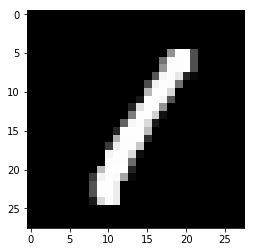

In [5]:
img = mnist.train.images[3]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
mnist.train.images.shape[1]

784

In [16]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')

# Output of hidden layer
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = encoded = tf.layers.dense(inputs=encoded, units=image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = 'output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits, name='loss')

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [17]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [18]:
mnist.train.num_examples

60000

In [19]:
mnist.train.num_examples//200

300

In [21]:
batch = mnist.train.next_batch(200)

In [27]:
batch

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
        1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9,
        8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0,
        0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7,
        4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0,
        4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8,
        5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8,
        2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9,
        1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2], dtype=uint8))

In [28]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6864
Epoch: 1/20... Training loss: 0.6823
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6710
Epoch: 1/20... Training loss: 0.6662
Epoch: 1/20... Training loss: 0.6590
Epoch: 1/20... Training loss: 0.6482
Epoch: 1/20... Training loss: 0.6370
Epoch: 1/20... Training loss: 0.6258
Epoch: 1/20... Training loss: 0.6090
Epoch: 1/20... Training loss: 0.5984
Epoch: 1/20... Training loss: 0.5814
Epoch: 1/20... Training loss: 0.5653
Epoch: 1/20... Training loss: 0.5481
Epoch: 1/20... Training loss: 0.5352
Epoch: 1/20... Training loss: 0.5139
Epoch: 1/20... Training loss: 0.4930
Epoch: 1/20... Training loss: 0.4745
Epoch: 1/20... Training loss: 0.4566
Epoch: 1/20... Training loss: 0.4436
Epoch: 1/20... Training loss: 0.4358
Epoch: 1/20... Training loss: 0.4171
Epoch: 1/20... Training loss: 0.4005
Epoch: 1/20... Training loss: 0.3880
Epoch: 1/20... Training loss: 0.3721
E

Epoch: 1/20... Training loss: 0.2159
Epoch: 1/20... Training loss: 0.2049
Epoch: 1/20... Training loss: 0.2060
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.2030
Epoch: 1/20... Training loss: 0.1988
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.2016
Epoch: 1/20... Training loss: 0.2028
Epoch: 1/20... Training loss: 0.2001
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.2020
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.2015
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1898
E

Epoch: 2/20... Training loss: 0.1632
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1673
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1671
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1637
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1632
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1704
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1741
E

Epoch: 3/20... Training loss: 0.1477
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1431
E

Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1342
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1347
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1315
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1317
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1319
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1354
E

Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1229
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1202
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1272
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1209
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1215
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1204
Epoch: 5/20... Training loss: 0.1200
Epoch: 5/20... Training loss: 0.1228
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1209
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1218
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1187
E

Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1143
E

Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1127
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1114
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1098
E

Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1054
E

Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0986
E

Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0995
E

Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.1022
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.1009
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0891
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0886
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0884
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

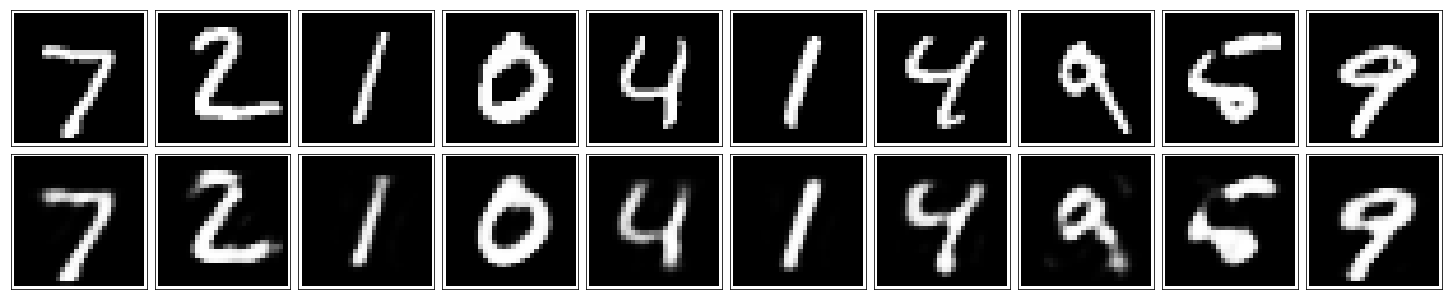

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [30]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.